<span style="color:black"><span style = "font-size:30px"> 6-mer frequency analysis</span>
&nbsp;&nbsp;&nbsp;
   
    
In this process, we selected four 6-mers, including the top three 6-mers that appear most frequently in native promoters (TAAAAT, TAGAAT, AAAATA) and the bacterial consensus -10 element (TATAAT) and analyzed the distributions of the four 6-mers in the native and synthetic promoters

1.	Import python modules and upload promoter datasets, i.e., native promoter dataset obtained through ‘Acquisition of promoter dataset’ and synthetic promoter dataset generated through ‘VAE training’.

In [1]:
# 1.

import pandas as pd
import matplotlib.pyplot as plt
#gendata = pd.read_excel('Generated promoters & Candidates.xlsx')
natdata = pd.read_csv('final_7942promoter.csv')

In [2]:
natdata

,0
0,TCCTGACTTCTATTGTCAGTCGCCAGAGGTTTGTTGTTAAACGTTA...
1,GTTCTAGTCGGAGTCGGTCAATCGGAACTGTATCCAGCACAGCGAT...
2,AATCGCTCAGAGTCCACTTCTGTAGTTCGGGATACGGCAAGATAAA...
3,ATTAATTCAGAACACCCTAACTCACGAGTGCTGGCAATGGTTTGAA...
4,CGATCGCAGTTCACTACTCGCTACTGCAACAACAGAGCGGACGGAA...
...,...
1466,AGTTGGAGGGGCGATCGGTCCCAAACAAAGCCGGATACTGAGGATT...
1467,CTGGTGCGGGTCCAGAAGTGCTGTTAGCGGCGCTGGAGCAAGTGTC...
1468,GAAGATGGTCGCCTTGTGAAAGGTGGACTGACCAGCCCTGTGCTCC...
1469,AAGCTTGGAAGTCTCGCAGCTCCTGGTCGAGGCTGGTATCACTCCC...


2.	Define the 'sixmer_candidates'. The function returns the list of the 6-mer most frequently observed up to a specified value defined at 'num'th.  

In [3]:
# 2. 

def sixmer_candidates(x, num):
    sixmerlist = []
    for i in range(3712):
        for j in range(20-6+1):
            sixmerct.append(x[i][80+j:86+j])
    sixmercand =list(set(sixmerlist))
    sixmercnt = []
    for i in sixmercand:
            sixmercnt.append(sixmerlist.count(i))
    result = []
    cnt = 0
    
    while cnt<num:
        popindex = max(sixmercnt)
        result.append(sixmercand[sixmercnt.index(popindex)])
        sixmercand.remove(result[-1])
        sixmercnt.remove(popindex)
    return result

3.	Define the 'checkseq' function. The 'checkseq' function returns a list of the distribution of every 6-mers in the promoter dataset. 

In [5]:
# 3.
            

def checkseq(seq,target,freq):
    checklist = []
    for j in range(100-6+1):
        check = 0
        for i in seq:
            if i[j:j+6] == target:
                check+=1
        checklist.append(check/freq)
    return checklist

#gen_promoter = gendata['promoter'].tolist()
nat_promoter = natdata['0'].tolist()
#nat_reads = natdata['Reads'].tolist()

4. Calculate the frequency of the four 6-mers (TATAAT, TAAAAT, TAGAAT, and AAAATA). 

In [6]:
# 4.
'''
nat_tataat = checkseq(nat_promoter,'TATAAT',3712)
nat_taaaat = checkseq(nat_promoter,'TAAAAT',3712)
nat_tagaat = checkseq(nat_promoter,'TAGAAT',3712)
nat_aaaata = checkseq(nat_promoter,'AAAATA',3712)
gen_tataat = checkseq(gen_promoter,'TATAAT',10000)
gen_taaaat = checkseq(gen_promoter,'TAAAAT',10000)
gen_tagaat = checkseq(gen_promoter,'TAGAAT',10000)
gen_aaaata = checkseq(gen_promoter,'AAAATA',10000)
'''

nat_tataat = checkseq(nat_promoter,'TATAAT',1471)

5. Plot the 6-mer frequency results using the ‘matplotlib’ module

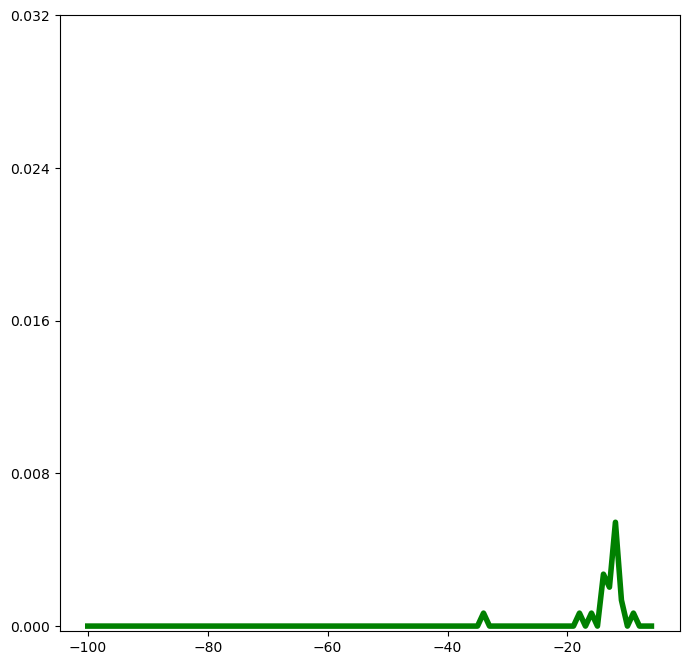

In [8]:
# 5.
import numpy as np
fig = plt.figure(figsize=(8,8)) 
fig.set_facecolor('white')
ax1 = fig.add_subplot()
color1 = 'green'
ax1.plot(range(-100,-5), nat_tataat, color=color1, label = 'Natural',linewidth = 4)
ax1.set_yticks(np.arange(0.00,0.04,0.008))
ax1.tick_params(axis='y')

''' 
color2 = 'orange'
ax2 = ax1.twinx()
ax2.plot(range(-100,-5), gen_tataat, color=color2,  label = 'Generated',linewidth = 4)
ax2.tick_params(axis='y')
ax2.set_yticks(np.arange(0.00,0.4,0.08))
'''
plt.show()